**Problem Statement**

Scaler is an online tech-versity offering intensive computer science & Data Science courses through live classes delivered by tech leaders and subject matter experts. The meticulously structured program enhances the skills of software professionals by offering a modern curriculum with exposure to the latest technologies. It is a product by InterviewBit.

You are working as a data scientist with the analytics vertical of Scaler, focused on profiling the best companies and job positions to work for from the Scaler database. You are provided with the information for a segment of learners and tasked to cluster them on the basis of their job profile, company, and other features. Ideally, these clusters should have similar characteristics.


Import Important Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
#Reading csv data
data = pd.read_csv('/content/scaler_clustering.csv')

In [ ]:
print("Dimensions of dataset ",data.shape)
data.head()


Dimensions of dataset  (205843, 7)


,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [ ]:
# Checking Data Types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153279 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


In [ ]:
## Checking Null Values
data.isna().sum()

,0
Unnamed: 0,0
company_hash,44
email_hash,0
orgyear,86
ctc,0
job_position,52564
ctc_updated_year,0


In [ ]:
# Checking for Duplicate Rows in dataset
len(data[data.duplicated()])

0

Data Preprocessing

In [ ]:
data['email_hash'].value_counts().head(10)

,count
email_hash,
bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b,10
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c,9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee,9
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378,9
b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66,8
faf40195f8c58d5c7edc758cc725a762d51920da996410b80ac4a4d85c803da0,8
4818edfd67ed8563dde5d083306485d91d19f4f1c95d193a1700e79dd245b75c,8
c0eb129061675da412b0deb15871dd06ef0d7cd86eb5f7e8cc6a20b0d1938183,8
d598d6f1fb21b45593c2afc1c2f76ae9f4cb7167156cdf93246d4192a89d8065,8


In [ ]:
display(data[data['email_hash'] == 'bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b'])
display(data[data['email_hash'] == '6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c'])

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
24109,24129,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,NaN,2020.0
45984,46038,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Support Engineer,2020.0
72315,72415,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Other,2020.0
102915,103145,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,FullStack Engineer,2020.0
117764,118076,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Data Analyst,2020.0
121483,121825,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Other,2019.0
124476,124840,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Support Engineer,2019.0
144479,145021,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,FullStack Engineer,2019.0
152801,153402,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Devops Engineer,2019.0
159835,160472,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,NaN,2019.0


,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
9857,9859,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2400000,QA Engineer,2020.0
10002,10006,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2400000,Devops Engineer,2020.0
10583,10587,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2400000,Backend Engineer,2020.0
12784,12793,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2400000,Other,2020.0
20715,20729,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2400000,SDET,2020.0
138253,138731,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2000000,SDET,2020.0
159251,159887,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2000000,Devops Engineer,2020.0
165343,166040,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2000000,Other,2020.0
178749,179593,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2000000,Backend Engineer,2020.0


In [ ]:
data = data.groupby('email_hash').first().reset_index()

In [ ]:
data

,email_hash,Unnamed: 0,company_hash,orgyear,ctc,job_position,ctc_updated_year
0,00003288036a44374976948c327f246fdbdf0778546904...,84782,bxwqgogen,2012.0,3500000,Backend Engineer,2019.0
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,506,nqsn axsxnvr,2013.0,250000,Backend Engineer,2020.0
2,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,51626,gunhb,2021.0,1300000,FullStack Engineer,2019.0
3,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,53905,bxwqgotbx wgqugqvnxgz,2004.0,2000000,FullStack Engineer,2021.0
4,00014d71a389170e668ba96ae8e1f9d991591acc899025...,138707,fvrbvqn rvmo,2009.0,3400000,None,2018.0
...,...,...,...,...,...,...,...
153438,fffc254e627e4bd1bc0ed7f01f9aebbba7c3cc56ac914e...,39683,tqxwoogz ogenfvqt wvbuho,2004.0,3529999,QA Engineer,2019.0
153439,fffcf97db1e9c13898f4eb4cd1c2fe862358480e104535...,186656,trnqvcg,2015.0,1600000,None,2018.0
153440,fffe7552892f8ca5fb8647d49ca805b72ea0e9538b6b01...,148878,znn avnv srgmvr atrxctqj otqcxwto,2014.0,900000,Devops Engineer,2019.0
153441,ffff49f963e4493d8bbc7cc15365423d84a767259f7200...,14115,zwq wgqugqvnxgz,2020.0,700000,FullStack Engineer,2020.0


In [ ]:
data.columns

Index(['email_hash', 'Unnamed: 0', 'company_hash', 'orgyear', 'ctc',
       'job_position', 'ctc_updated_year', 'orgyear_na',
       'ctc_updated_year_na'],
      dtype='object')

In [ ]:
## Creating null value indicator columns
for i in ['orgyear','ctc_updated_year','company_hash','job_position']:
  data[i+'_na'] = data[i].isna()


In [ ]:
import re

In [ ]:
## Cleaning text columns

text_cols = ['company_hash']
for i in text_cols:
  data[i] = data[i].fillna('Not Available').apply(lambda x: re.sub('[^A-Za-z0-9 ]+', '', str(x).title()))

In [ ]:
## Creating new columns
data['YoE'] = data['ctc_updated_year'] - data['orgyear']

In [ ]:
# Frequency mean encoding
freq = 'company_hash'
data[freq] = data[freq].fillna('na')
enc_nom = (data.groupby(freq).size()) / len(data)
data[freq+'_encode'] = data[freq].apply(lambda x : enc_nom[x])

freq = 'job_position'
data[freq] = data[freq].fillna('na')
enc_nom = (data.groupby(freq).size()) / len(data)*10000
data[freq+'_encode'] = data[freq].apply(lambda x : enc_nom[x])

In [ ]:
## Removing Outliers from Orgyear column
sorted(data['orgyear'].fillna(0).astype(int).unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 38,
 83,
 91,
 200,
 201,
 206,
 208,
 209,
 1900,
 1970,
 1971,
 1972,
 1973,
 1976,
 1977,
 1979,
 1981,
 1982,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023,
 2024,
 2025,
 2026,
 2027,
 2028,
 2029,
 2031,
 2101,
 2106,
 2107,
 2204,
 20165]

In [ ]:
data = data[~data['orgyear'].isin([0,
 1,
 2,
 3,
 4,
 5,
 6,
 38,
 83,
 91,
 200,
 201,
 206,
 208,
 209,
 1900,
 2025,
 2026,
 2027,
 2028,
 2029,
 2031,
 2101,
 2106,
 2107,
 2204,
 20165])]

In [ ]:
data = data[~(data['YoE']<0)]

Univariate Analysis

In [ ]:
# Plotting Categorical Features
categroical_columns = ['company_hash','job_position','orgyear','ctc_updated_year']

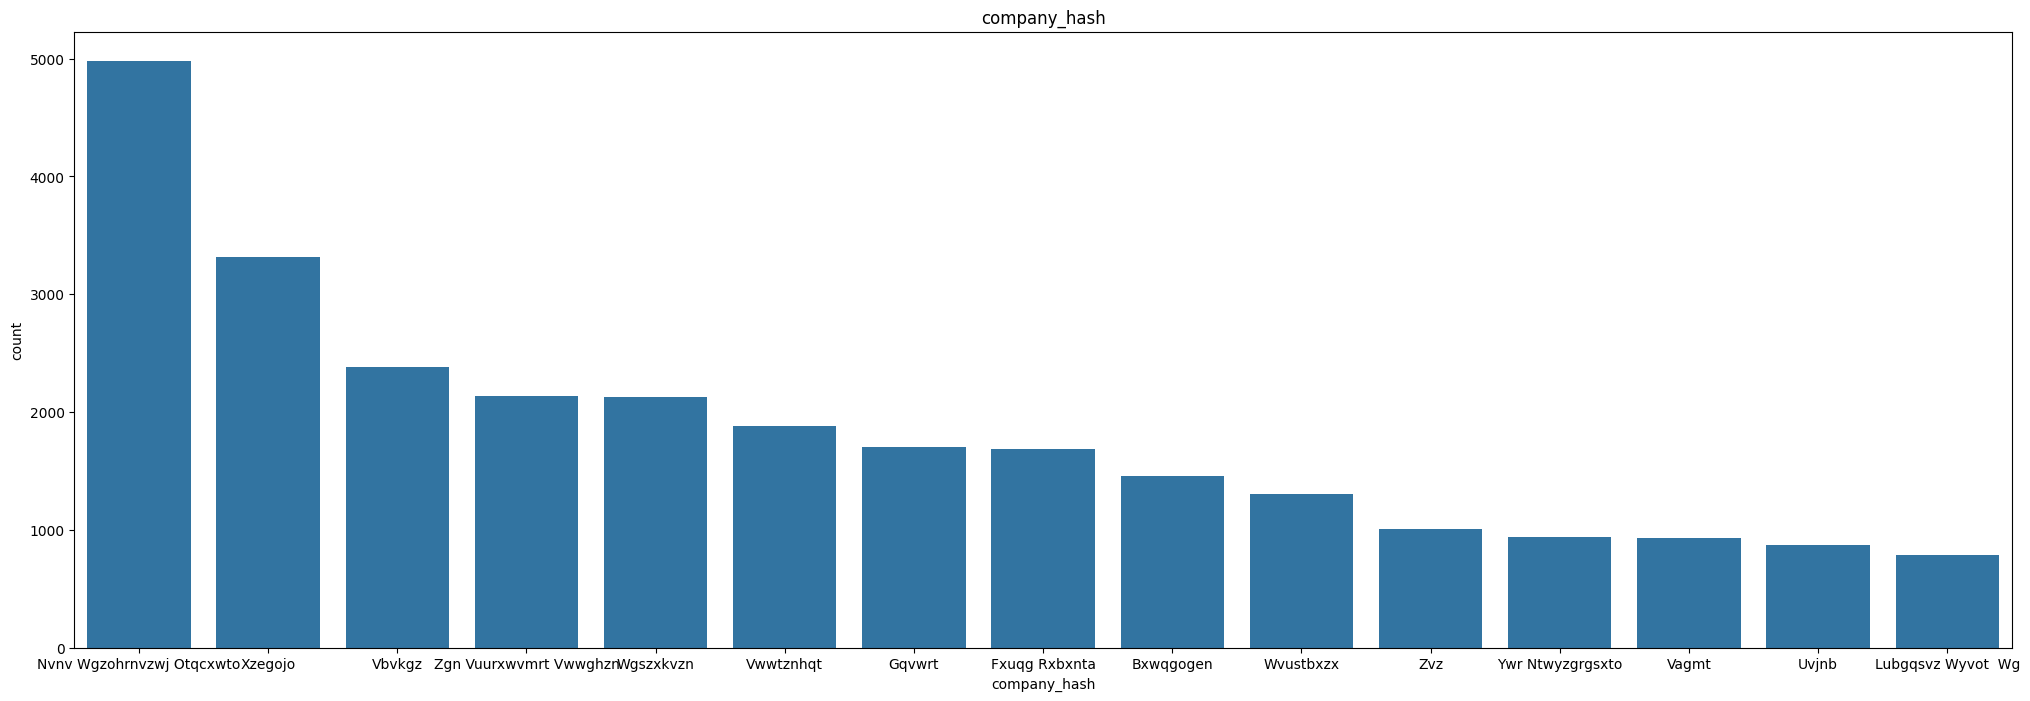

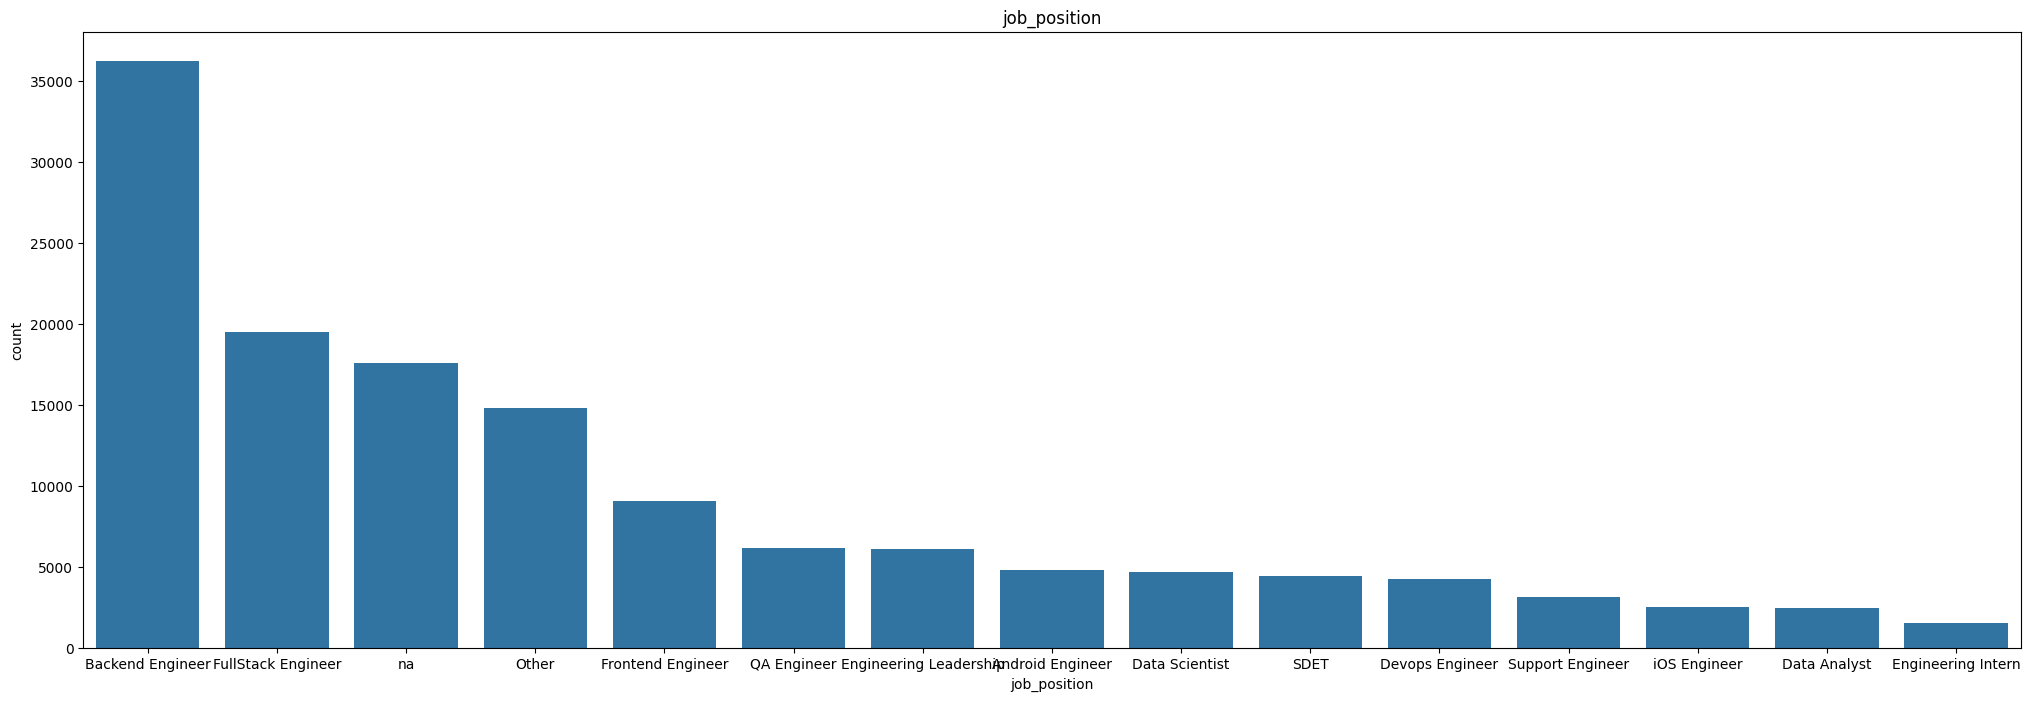

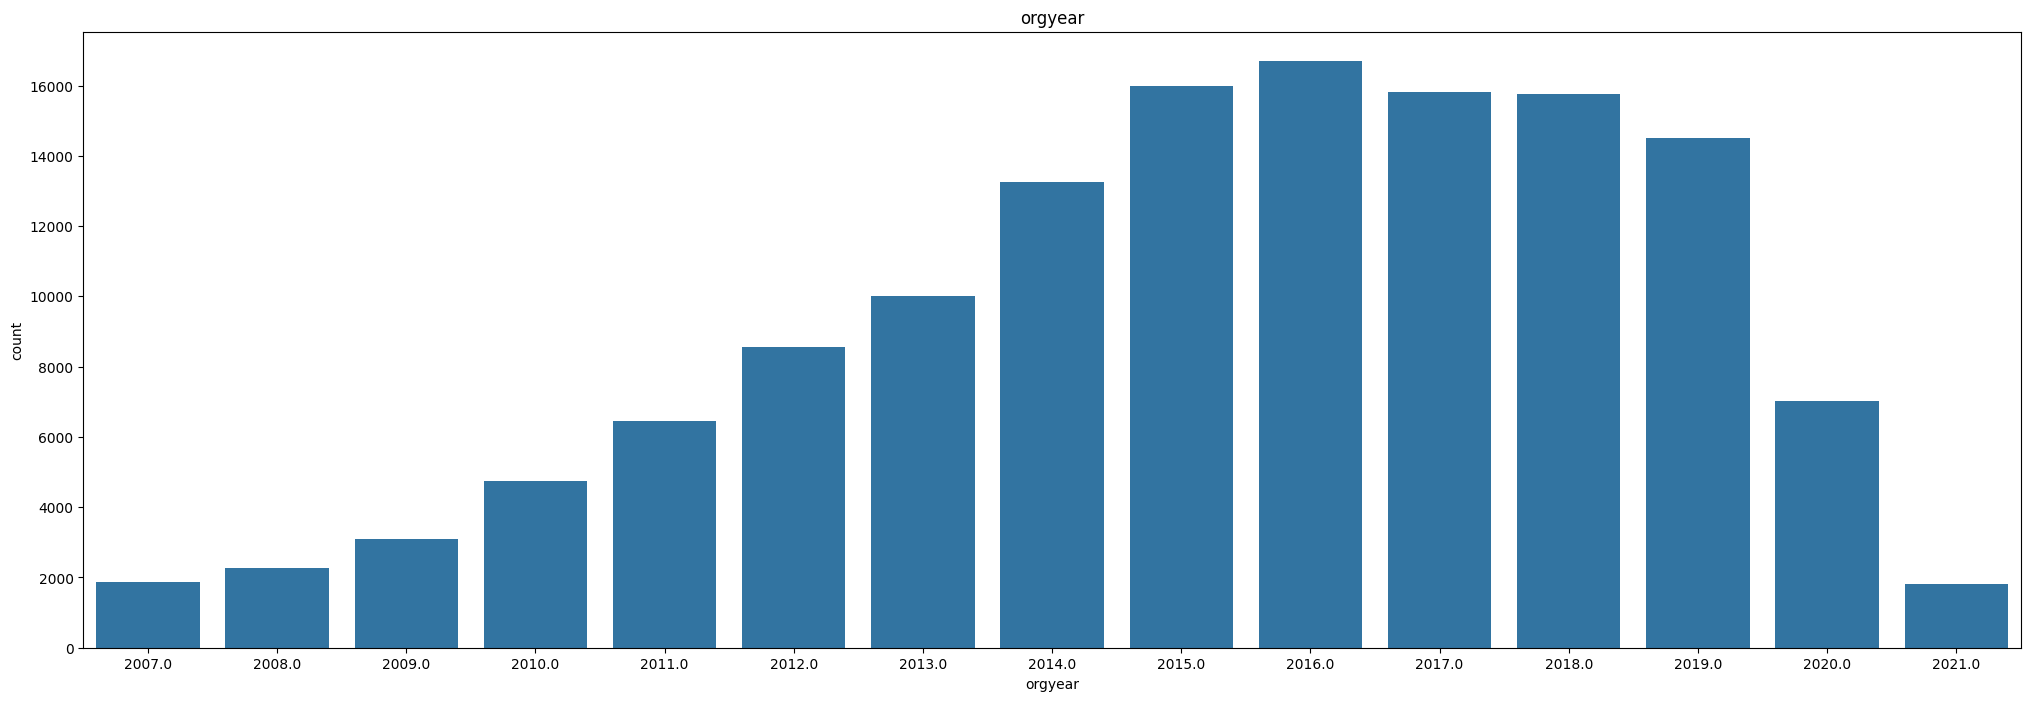

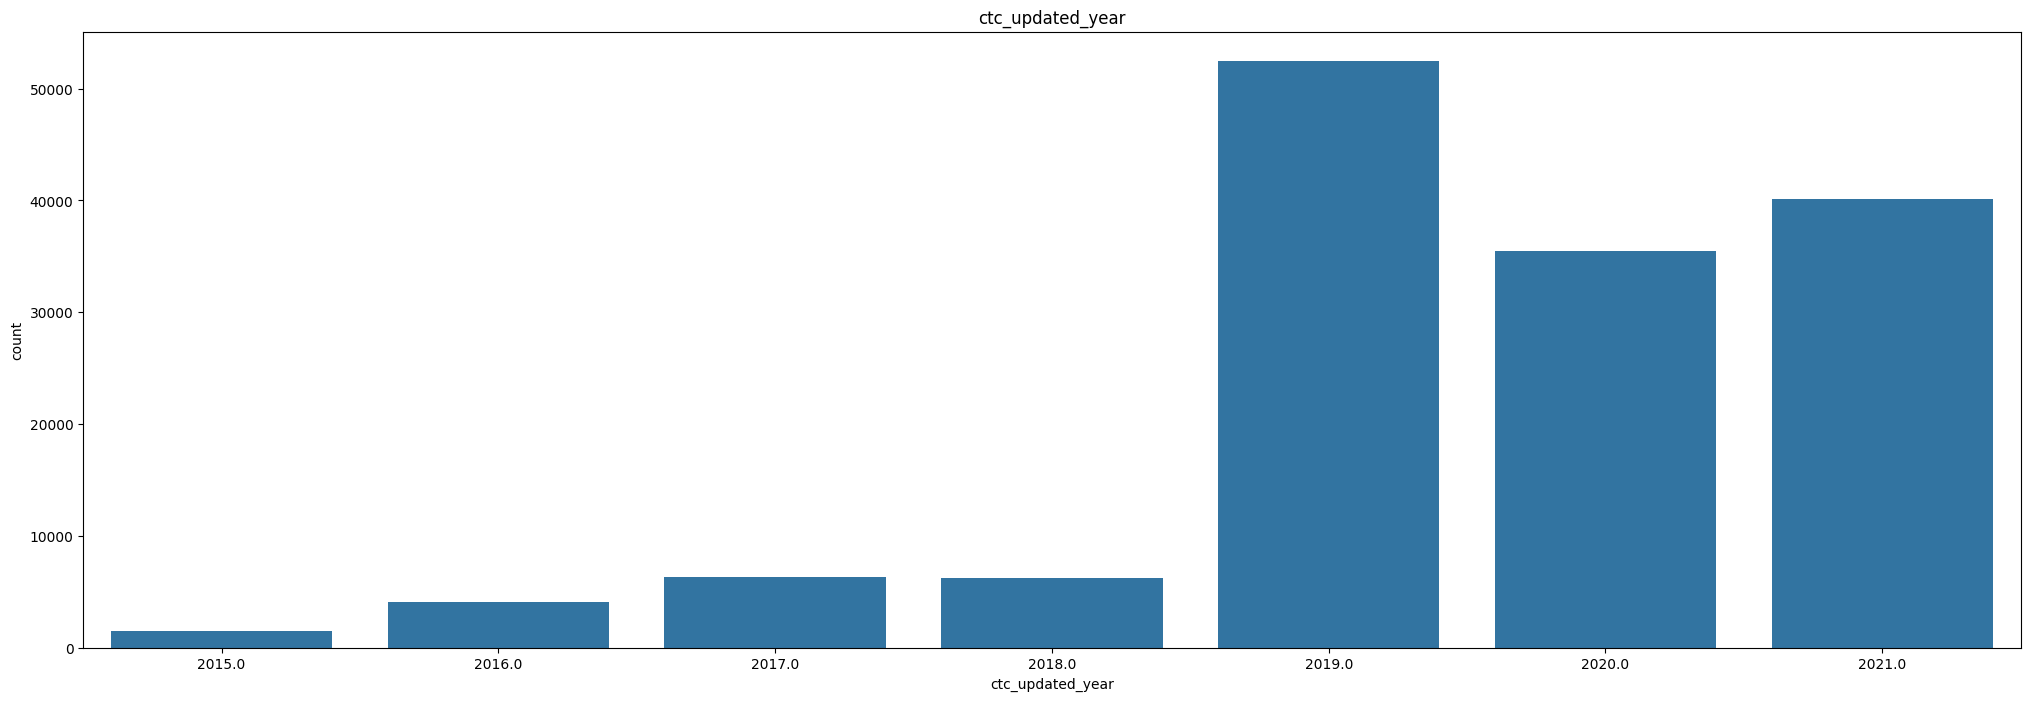

In [ ]:
for i in categroical_columns:
    tmp = data.copy()
    tmp['count'] = 1
    tmp = tmp.groupby(i).sum()['count'].reset_index().sort_values('count',ascending=False).head(15)
    plt.figure(figsize=(25,8))
    sns.barplot(data=tmp,y='count',x=i).set(title=i)

    plt.show()

Plotting Continuous Features

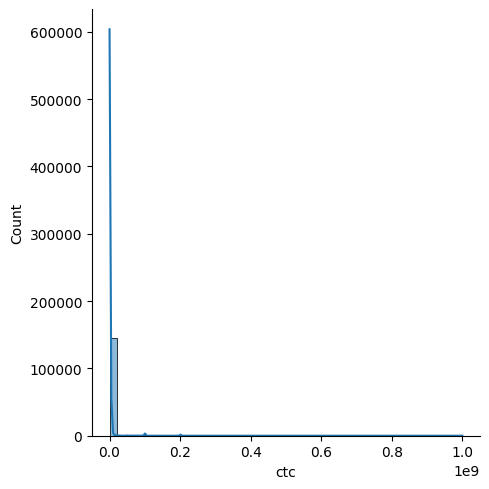

In [ ]:
sns.displot(data['ctc'],kde=True,bins=50)
plt.show()

scale column for visualizing

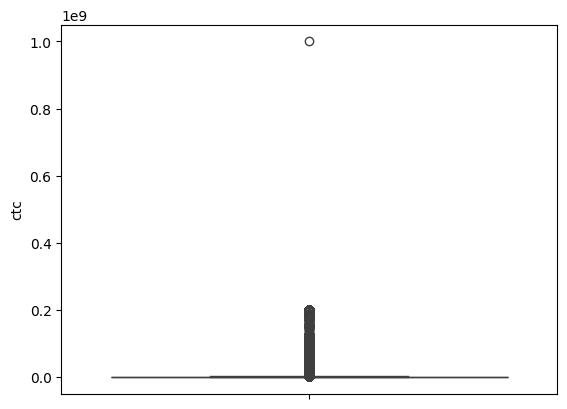

In [ ]:
v = data['ctc']
sns.boxplot(v)
plt.show()

In [ ]:
data.sort_values(['ctc']).iloc[1000:1020,:]

,email_hash,Unnamed: 0,company_hash,orgyear,ctc,job_position,ctc_updated_year,orgyear_na,ctc_updated_year_na,company_hash_na,job_position_na,YoE,company_hash_encode,job_position_encode
40428,439134c4b243fe33a240265f94d0c9d6e120f31cb6e2cc...,98842,Trxztdn,2019.0,20000,QA Engineer,2019.0,False,False,False,False,0.0,0.000007,401.973371
30954,3394eeca520d9029ce6bd56e83faa5d4d82c396f453e2a...,97003,Mrvmmtq,2011.0,20000,Android Engineer,2019.0,False,False,False,False,8.0,0.000007,317.968236
78889,83d1ece927b7d7e944454483a4a8a3b08a18ed846890ee...,88544,Oxbgz Eqvotq Hzxctqoxnj,2016.0,20000,Other,2017.0,False,False,False,False,1.0,0.000026,1026.830810
90663,975e224e718de0d75c2d33d2bf24e75c4b7559664763b1...,125784,Wgcvrtzot Ntwyzgrgsxto,2016.0,20000,Backend Engineer,2019.0,False,False,False,False,3.0,0.000020,2431.717315
74910,7d43b749f1651cba0a16743d6235f5f32a9a58837ee081...,24380,Ovu,2008.0,20000,QA Engineer,2019.0,False,False,False,False,11.0,0.004112,401.973371
38801,40bf699c6ab3273acfdda2c7922b30dbc5f8cedea903f4...,93058,Zgzt,2008.0,20000,FullStack Engineer,2019.0,False,False,False,False,11.0,0.003395,1319.056588
25247,29e7d12a6225aeff7b5d92947f949e6646ec58111e5a5a...,4290,Vqttzv Bhrnxbtaxv,2001.0,20000,Other,2021.0,False,False,False,False,20.0,0.000007,1026.830810
117820,c4a7229bb63eade33516411b68d8501420e15987d116eb...,135189,Uyvqbtvoj,2012.0,20000,Backend Engineer,2019.0,False,False,False,False,7.0,0.000398,2431.717315
73669,7b3b93e56fd67d3ddfeb41f68a88a61d01c397aab9bbe1...,151028,Bvqxogen,2017.0,20000,na,2019.0,False,False,False,True,2.0,0.000007,1318.079026
71300,774a4a75a15f53e19bbf4ef85a5c6dc3da689e4291f773...,77722,Rxetonjrt Xzntqzvnxgzvr Ucn Rna,2010.0,20000,Other,2016.0,False,False,False,False,6.0,0.000007,1026.830810


In [ ]:
data = data[data['ctc'] >702475]

In [ ]:
## Remove Outlier
dftmp = data.copy()
print(dftmp.shape)
cols = ['ctc'] # one or more

Q1 = dftmp[cols].quantile(0.25)
Q3 = dftmp[cols].quantile(0.75)
IQR = Q3 - Q1

dftmp = dftmp[~((dftmp[cols] < (Q1 - 1.5 * IQR)) |(dftmp[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(dftmp.shape)

(92558, 14)
(86464, 14)


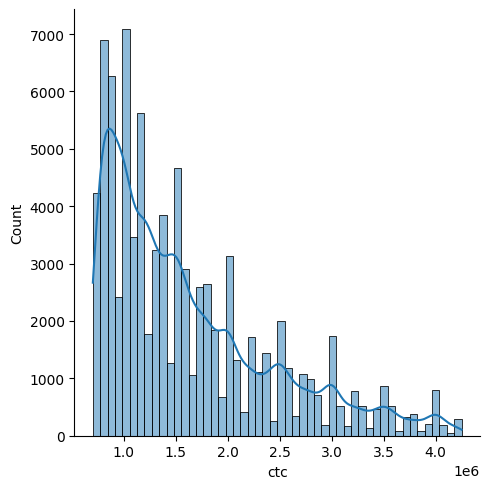

In [ ]:
v = dftmp['ctc']
sns.displot(v,kde=True,bins=50)
plt.show()

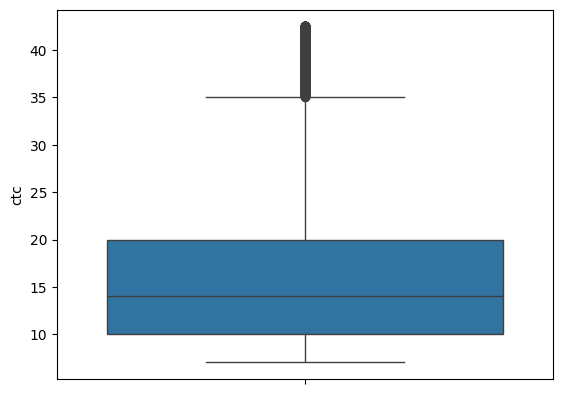

In [ ]:
v = dftmp['ctc']/100000
sns.boxplot(v)
plt.show()

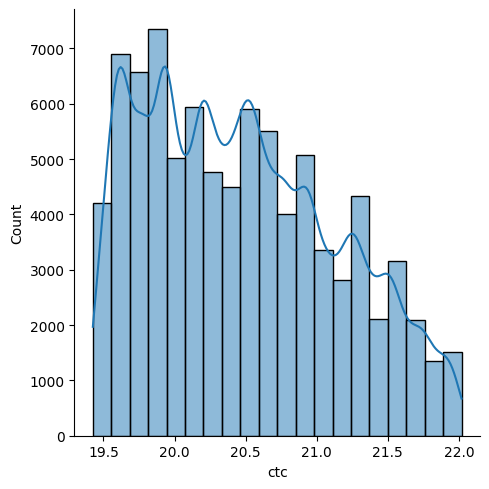

In [ ]:
v = np.log2(dftmp['ctc'])
sns.displot(v,kde=True,bins=20)
plt.show()

Multivariate Analysis

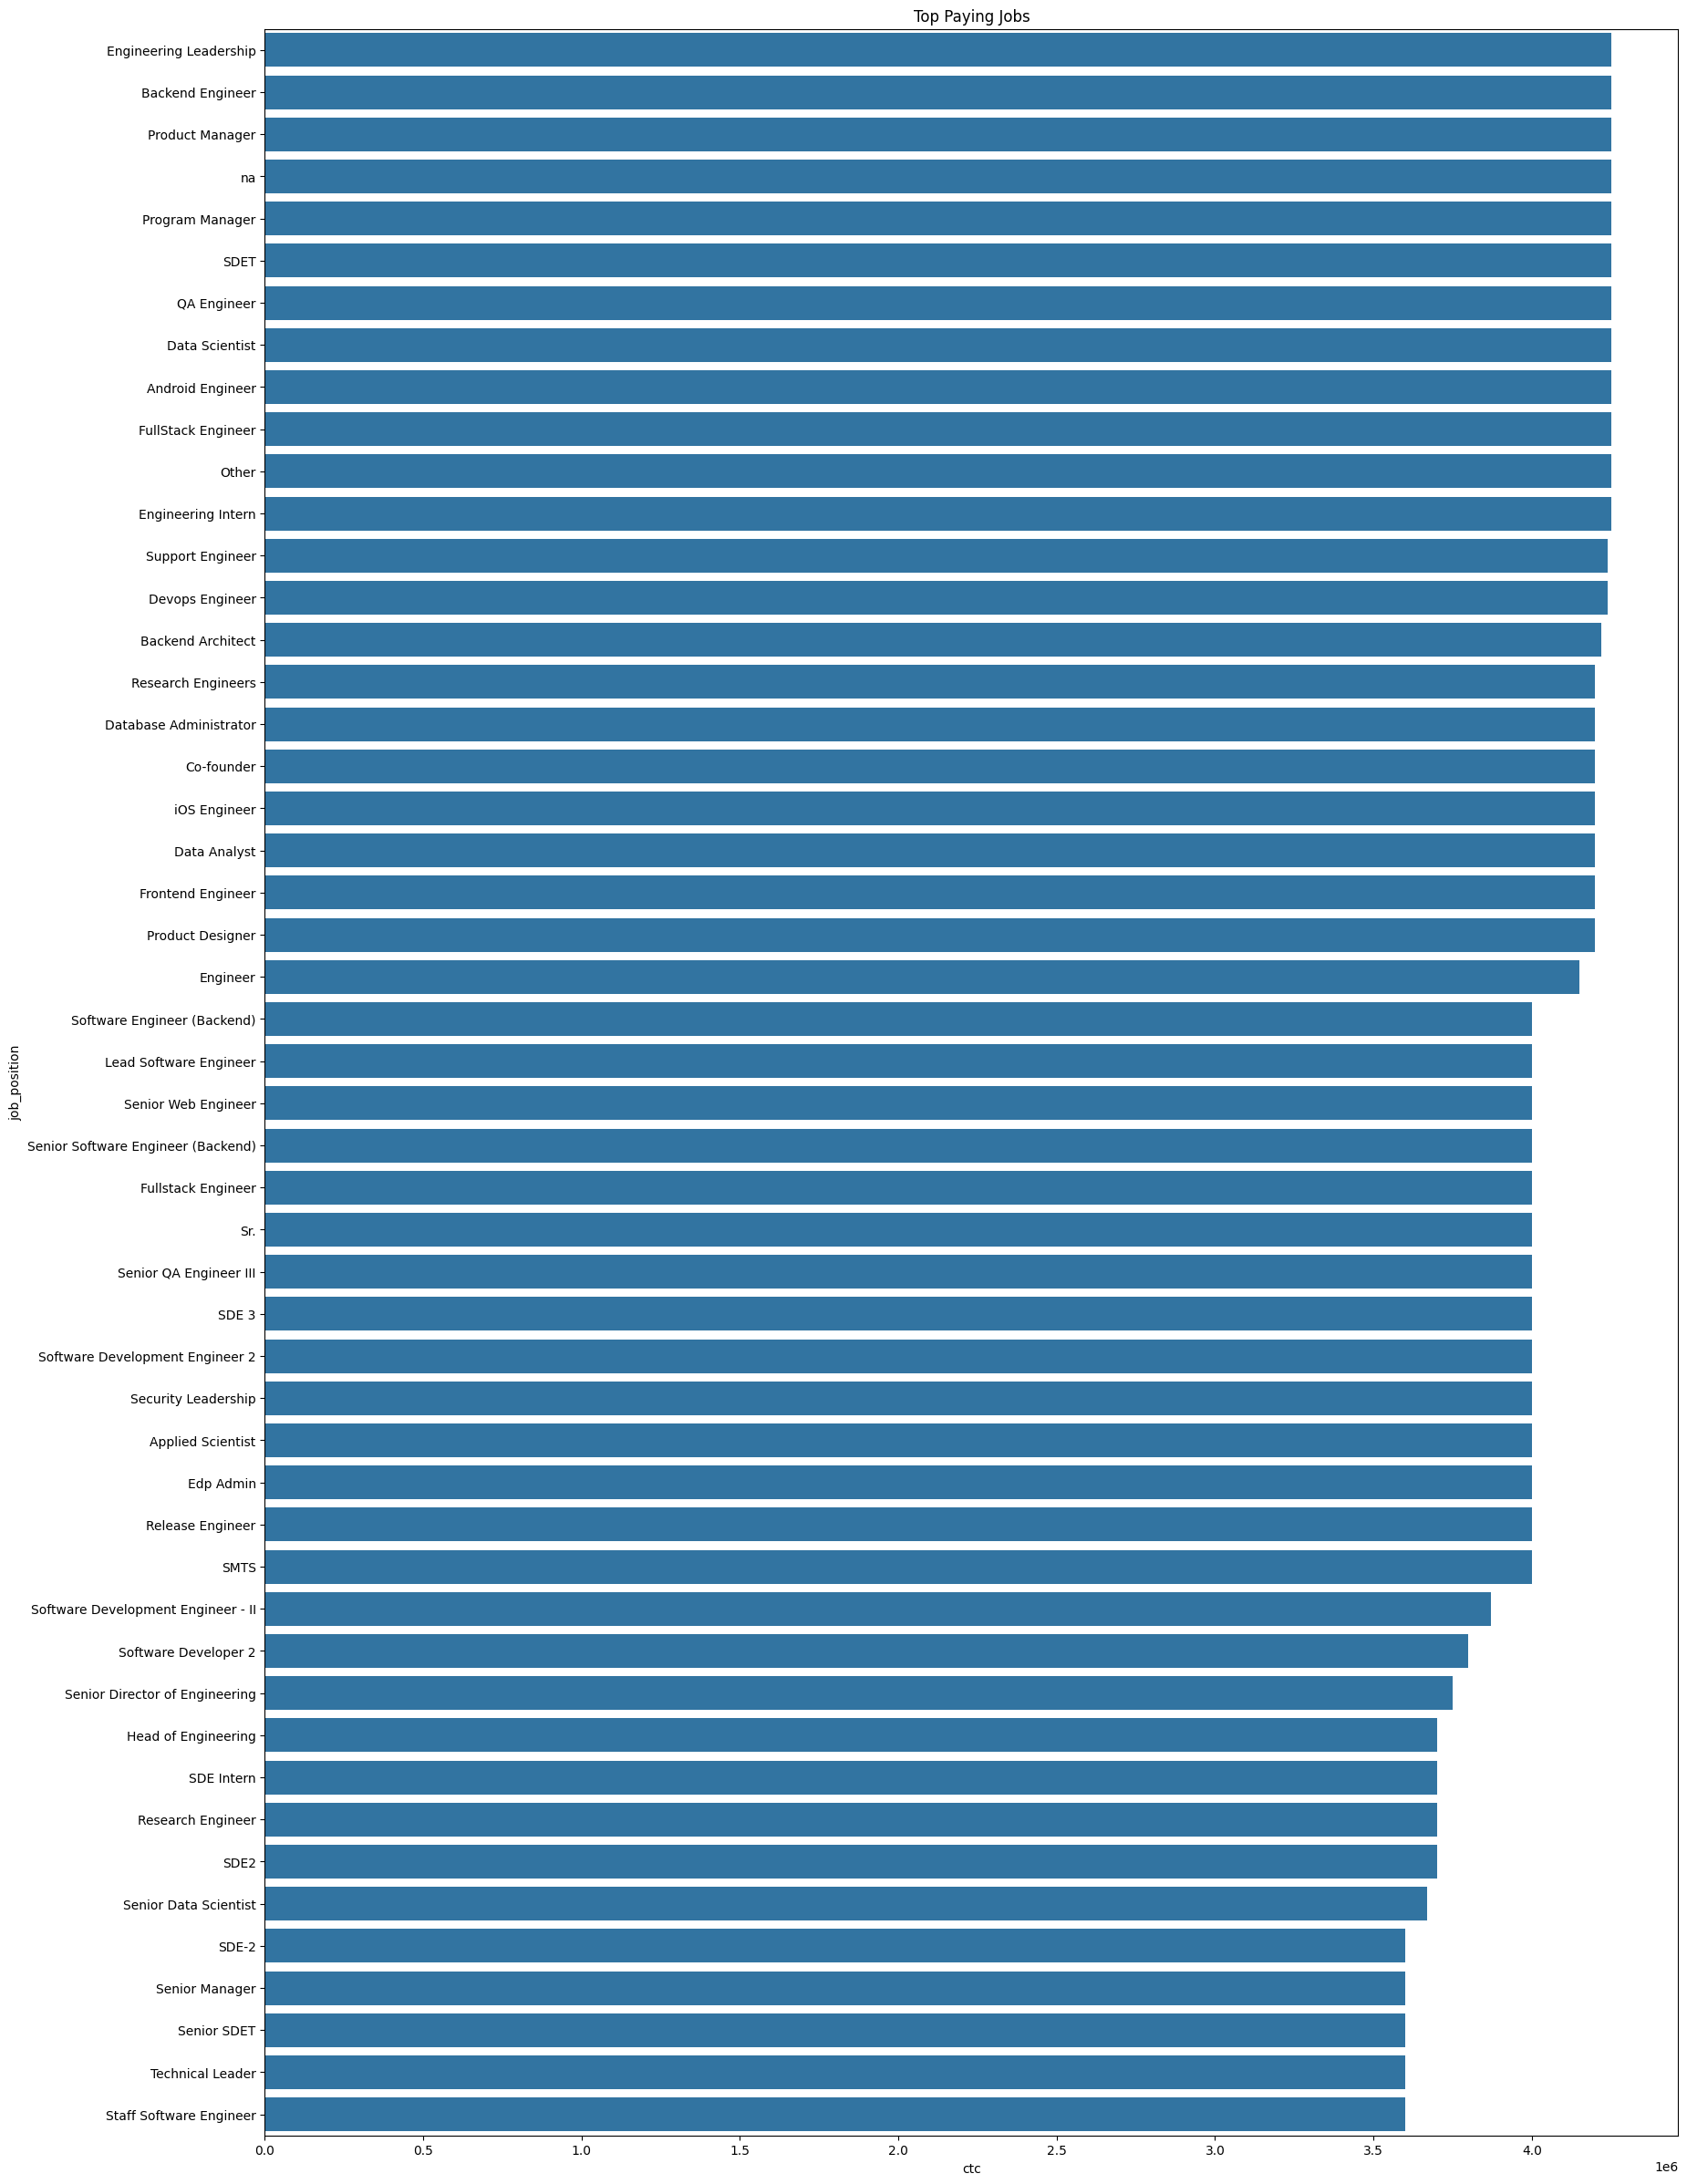

['Engineering Leadership',
 'Backend Engineer',
 'Product Manager',
 'na',
 'Program Manager',
 'SDET',
 'QA Engineer',
 'Data Scientist',
 'Android Engineer',
 'FullStack Engineer',
 'Other',
 'Engineering Intern',
 'Support Engineer',
 'Devops Engineer',
 'Backend Architect',
 'Research Engineers',
 'Database Administrator',
 'Co-founder',
 'iOS Engineer',
 'Data Analyst',
 'Frontend Engineer',
 'Product Designer',
 'Engineer',
 'Software Engineer (Backend)',
 'Lead Software Engineer',
 'Senior Web Engineer',
 'Senior Software Engineer (Backend)',
 'Fullstack Engineer',
 'Sr.',
 'Senior QA Engineer III',
 'SDE 3',
 'Software Development Engineer 2',
 'Security Leadership',
 'Applied Scientist',
 'Edp Admin',
 'Release Engineer',
 'SMTS',
 'Software Development Engineer - II',
 'Software Developer 2',
 'Senior Director of Engineering',
 'Head of Engineering',
 'SDE Intern',
 'Research Engineer',
 'SDE2',
 'Senior Data Scientist',
 'SDE-2',
 'Senior Manager',
 'Senior SDET',
 'Technica

In [ ]:
tmp = dftmp.copy()
tmp = tmp.groupby(['job_position']).max()['ctc'].reset_index().sort_values('ctc',ascending=False).head(50)
plt.figure(figsize=(20,30))
sns.barplot(data=tmp,x='ctc',y='job_position').set(title="Top Paying Jobs")
plt.show()
list(tmp['job_position'])

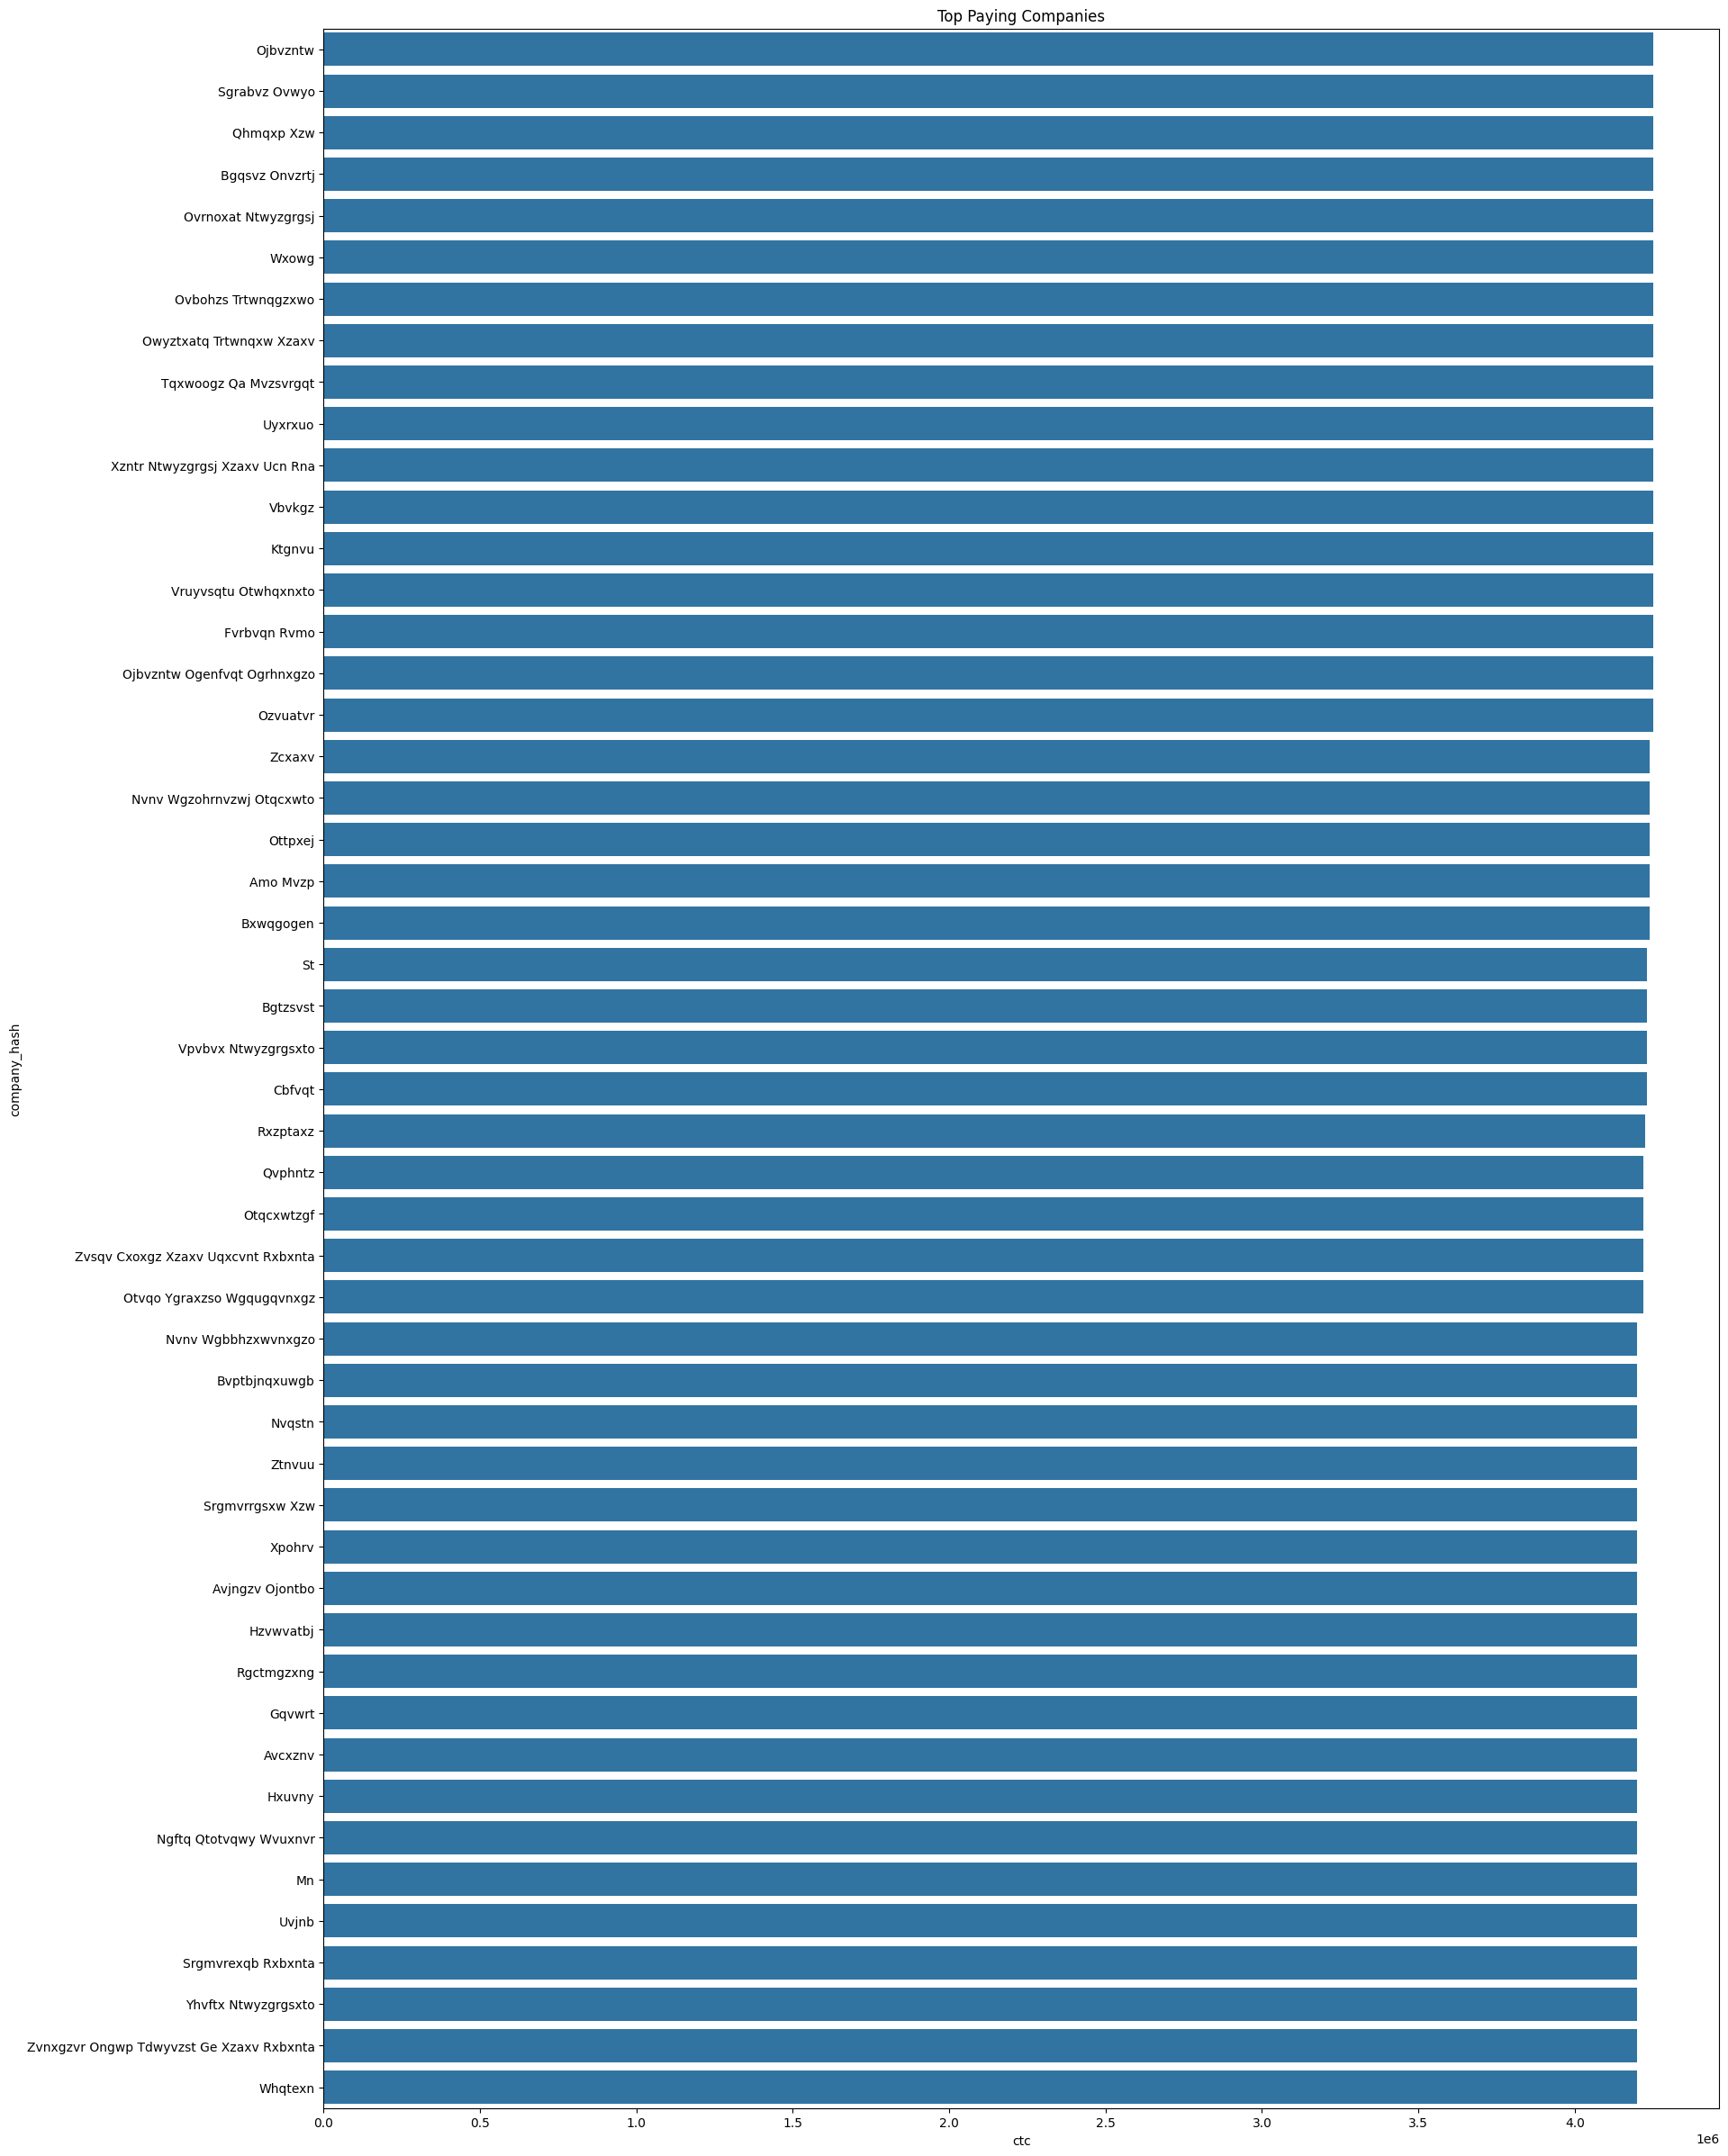

['Ojbvzntw',
 'Sgrabvz Ovwyo',
 'Qhmqxp Xzw',
 'Bgqsvz Onvzrtj',
 'Ovrnoxat Ntwyzgrgsj',
 'Wxowg',
 'Ovbohzs Trtwnqgzxwo',
 'Owyztxatq Trtwnqxw Xzaxv',
 'Tqxwoogz Qa Mvzsvrgqt',
 'Uyxrxuo',
 'Xzntr Ntwyzgrgsj Xzaxv Ucn Rna',
 'Vbvkgz',
 'Ktgnvu',
 'Vruyvsqtu Otwhqxnxto',
 'Fvrbvqn Rvmo',
 'Ojbvzntw Ogenfvqt Ogrhnxgzo',
 'Ozvuatvr',
 'Zcxaxv',
 'Nvnv Wgzohrnvzwj Otqcxwto',
 'Ottpxej',
 'Amo Mvzp',
 'Bxwqgogen',
 'St',
 'Bgtzsvst',
 'Vpvbvx Ntwyzgrgsxto',
 'Cbfvqt',
 'Rxzptaxz',
 'Qvphntz',
 'Otqcxwtzgf',
 'Zvsqv Cxoxgz Xzaxv Uqxcvnt Rxbxnta',
 'Otvqo Ygraxzso Wgqugqvnxgz',
 'Nvnv Wgbbhzxwvnxgzo',
 'Bvptbjnqxuwgb',
 'Nvqstn',
 'Ztnvuu',
 'Srgmvrrgsxw Xzw',
 'Xpohrv',
 'Avjngzv Ojontbo',
 'Hzvwvatbj',
 'Rgctmgzxng',
 'Gqvwrt',
 'Avcxznv',
 'Hxuvny',
 'Ngftq Qtotvqwy Wvuxnvr',
 'Mn',
 'Uvjnb',
 'Srgmvrexqb Rxbxnta',
 'Yhvftx Ntwyzgrgsxto',
 'Zvnxgzvr Ongwp Tdwyvzst Ge Xzaxv Rxbxnta',
 'Whqtexn']

In [ ]:
tmp = dftmp.copy()
tmp = tmp.groupby(['company_hash']).max()['ctc'].reset_index().sort_values('ctc',ascending=False).head(50)
plt.figure(figsize=(20,30))
sns.barplot(data=tmp,x='ctc',y='company_hash').set(title="Top Paying Companies")
plt.show()

list(tmp['company_hash'])

NameError: name 'dateda' is not defined

Manual Clustering

In [ ]:
grp = ['company_hash','job_position','YoE']
data_tmp1 = data.groupby(grp).agg({'ctc':['mean','median','min','max','count']}).reset_index()
data_tmp1.columns  = ["{} {}".format(b_, a_) if a_ not in grp else "{}".format(a_) for a_, b_ in zip(data_tmp1.columns.droplevel(1), data_tmp1.columns.droplevel(0))  ]
data_tmp1.head(100).tail(50)

datatmp = data.merge(data_tmp1[['company_hash', 'job_position', 'YoE', 'mean ctc']],on=['company_hash', 'job_position', 'YoE'],how='left')



col1 = 'ctc'
col2 = 'mean ctc'
conditions  = [ datatmp[col1] > datatmp[col2], datatmp[col1] == datatmp[col2], datatmp[col1] < datatmp[col2] ]
choices     = [ 1, 2, 3 ]

datatmp['Designation'] = np.select(conditions, choices, default=np.nan)

In [ ]:
grp = ['company_hash','job_position']
data_tmp1 = datatmp.groupby(grp).agg({'ctc':[('mean2','mean'),'median','min','max','count']}).reset_index()
data_tmp1.columns  = ["{} {}".format(b_, a_) if a_ not in grp else "{}".format(a_) for a_, b_ in zip(data_tmp1.columns.droplevel(1), data_tmp1.columns.droplevel(0))  ]
data_tmp1.head(100).tail(50)


datatmp = datatmp.merge(data_tmp1[grp + ['mean2 ctc']],on=grp,how='left')


col1 = 'ctc'
col2 = 'mean2 ctc'
conditions  = [ datatmp[col1] > datatmp[col2], datatmp[col1] == datatmp[col2], datatmp[col1] < datatmp[col2] ]
choices     = [ 1, 2, 3 ]

datatmp['Class'] = np.select(conditions, choices, default=np.nan)

In [ ]:
grp = ['company_hash']
data_tmp1 = datatmp.groupby(grp).agg({'ctc':[('mean3','mean'),'median','min','max','count']}).reset_index()
data_tmp1.columns  = ["{} {}".format(b_, a_) if a_ not in grp else "{}".format(a_) for a_, b_ in zip(data_tmp1.columns.droplevel(1), data_tmp1.columns.droplevel(0))  ]
data_tmp1.head(100).tail(50)


datatmp = datatmp.merge(data_tmp1[grp + ['mean3 ctc']],on=grp,how='left')


col1 = 'ctc'
col2 = 'mean3 ctc'
conditions  = [ datatmp[col1] > datatmp[col2], datatmp[col1] == datatmp[col2], datatmp[col1] < datatmp[col2] ]
choices     = [ 1, 2, 3 ]

datatmp['Tier'] = np.select(conditions, choices, default=np.nan)

In [ ]:
datatmp['diff_desig'] = datatmp['ctc'] - datatmp['mean ctc']
datatmp['diff_class'] = datatmp['ctc'] - datatmp['mean2 ctc']
datatmp['diff_tier'] = datatmp['ctc'] - datatmp['mean3 ctc']

Top 10 employees (earning more than most of the employees in the company) - Tier 1

In [ ]:
datatmp[datatmp['Tier'] == 1].sort_values('diff_tier',ascending=False).head(10)[['email_hash','ctc','mean3 ctc']]

,email_hash,ctc,mean3 ctc
81508,e135ffb97e2b42e80c6e65445c303cd810ba000965966c...,200000000,2.546788e+06
43056,76fec55391d520a956adabf982d88faf6842b6188b901f...,200000000,2.562187e+06
76465,d361e94a21d4b5eddb955a2494dc451d4c8387fcfd0fb1...,200000000,2.840463e+06
36577,650d378bf18c2ddcdbbebff5ab90917c510d5c95cf8f32...,200000000,2.921111e+06
59174,a35a5abbe9fb056421bdd9aca4440acfb93e37c823564d...,200000000,3.004664e+06
7912,1540fee242dcf17af1525ba7f5109fc76101319a161064...,200000000,3.004664e+06
42869,7683974378d0f5bacf95632f130a60cfa3ca39e368eec9...,200000000,3.004664e+06
64162,b114758a5c36d4ae7242b09e365c0ab00f5f7d6fb5eb20...,200000000,3.013707e+06
30540,54bafd5fc688d31915438560bd4e94225a829a5619cb11...,200000000,3.167787e+06
86764,ef9987c98edad9756ad357f551c5c861f46f8e493b358c...,200000000,3.447851e+06


Top 10 employees of data science earning more than their peers - Class 1

In [ ]:
datatmp[(datatmp['Tier'] == 1)&(datatmp['Class'] == 1)&(datatmp['job_position'].isin(['Data Science Analyst','Data Scientist','Data Scientist II','Associate Data Scientist','Senior Data Scientist']))].sort_values('diff_class',ascending=False).head(10)[['email_hash','ctc','mean2 ctc']]

,email_hash,ctc,mean2 ctc
74357,cda8d723438e81185d2ee8c348870a4612eea974cdb2db...,200000000,4.113400e+07
68425,bd222ea783ee372da4e0ad60fdccec0b8f37999a032025...,200000000,6.743667e+07
8069,15adaeb2eef9c0ee8a0f18e189bf426be390f5d1e911fd...,60000000,5.223667e+06
38853,6b6dd66bae787dd4dd417e1777f8ea5a057257e9019995...,100000000,5.040000e+07
89695,f7b7c771ccdbbca7248002ba83f7a176baa974c2c7bb8f...,24200000,3.239412e+06
32378,599e489c815ba51967965c5d6adefd7a76a99ffaa129bd...,22500000,4.342800e+06
65843,b5dc6ad6d8d8f04312c34285a3c45fd9ffdc73ff3f1205...,20000000,2.095595e+06
46701,80f1ae60373f0ada3b75ce19eb585f8cf112de3cfa6ea7...,20000000,2.424706e+06
57935,9fdab215a86b0e2f18ee6c3d7653442cd7ad8b9cc4cf91...,18000000,9.566667e+06
75654,d1290b7e2d85c75902b863ccc3e4aafdd6e6eb07a10a00...,12000000,4.262500e+06


Bottom 10 employees of data science earning less than their peers - Class 3

In [ ]:
datatmp[(datatmp['Tier'] == 1)&(datatmp['Class'] == 3)&(datatmp['job_position'].isin(['Data Science Analyst','Data Scientist','Data Scientist II','Associate Data Scientist','Senior Data Scientist']))].sort_values('diff_class',ascending=True).head(10)[['email_hash','ctc','mean2 ctc']]

,email_hash,ctc,mean2 ctc
36076,63a294192207a3342e7e1f68bb2bd793020489f118da6d...,1959999,5.223667e+06
4543,0c25f5d183526e9731c9b83d0dab190d1edaa99ccfadeb...,2100000,5.223667e+06
46210,7fa31beaff14d46d15caddb25e43b60a6f5b99b598a32b...,2100000,5.223667e+06
4752,0cc00f713e6a17971a4e783e5235cc08e27cf0bed506df...,2100000,5.003333e+06
47287,829d2ac71b83f89be10804750871d0421e7df303ade462...,2700000,5.223667e+06
80753,df2101e2c68d4555e2a5ce1c18a87e120b19d4e181b4bc...,2050000,4.350000e+06
4774,0ccb803809d85dd78169e732fdbf4ffcae5ee6d68db662...,2300000,4.262500e+06
39879,6e4b185d9b1fa901e6c408dd226e24dd3eb4d24695084b...,1500000,3.066667e+06
15503,2a3136f6e2d03a3dbfa3f683e4ae1b744b4815a8e0177c...,1700000,3.125000e+06
44462,7adf15ce2bfe62c24f197f0a0499b47ed93b433300db35...,3500000,4.833333e+06


Bottom 10 employees (earning less than most of the employees in the company)- Tier 3

In [ ]:
datatmp[datatmp['Tier'] == 3].sort_values('diff_tier',ascending=True).head(10)[['email_hash','ctc','mean3 ctc']]

,email_hash,ctc,mean3 ctc
80237,ddbbd16a9ac9d1d9c8b604e0a089937023dadedddc662e...,2700000,1.342333e+08
43881,793d210c25ac9e3a1883e6f33097f3a5b9f07b5c58b57f...,1050000,1.053500e+08
61394,a98c65f132480028f7cba69f655bbdf0a443f4a14ab3ef...,740000,1.003700e+08
89500,f728b413aa15501b679ef536edbbe2e231f95d49fb7317...,750000,1.003750e+08
65504,b4e82058eb5ff49ddb8f02256510f6a2cf52ea18ed7c01...,770000,1.003850e+08
57679,9f20957a8a74b7318e74cd8202bdb47a7416af81672301...,800000,1.004000e+08
26087,482bf44a26d01aa6e8313253f8956ea8cc2f2206be9307...,900000,1.004500e+08
78158,d7eea3464e3f6a210a256f9bdc219ebbaf65484b3ff6f5...,910000,1.004550e+08
41581,72f5ddcd6b94662b785120952636a5f2fde42047b20cf1...,1000000,1.005000e+08
71030,c47d0ca9351ad3035905a9cd14ee885f6e444f7b11929b...,1000000,1.005000e+08


Top 10 employees in Amazon- X department - having 5/6/7 years of experience earning more than their peers - Tier X

In [ ]:
datatmp[(datatmp['YoE'].isin([5,6,7]))&(datatmp['company_hash'])].sort_values('diff_desig',ascending=False).head(10)[['email_hash','ctc','mean ctc']]

,email_hash,ctc,mean ctc
41043,71816854137816ffdc94fc2b283803af8e38979e2d0992...,200000000,1.344288e+07
63541,af7e865dba7de46700156df4317df109c89146217fd77e...,200000000,1.542086e+07
336,00eebd69d81c0bb5d4ad91392d7b994395333d98cae7f0...,200000000,1.626650e+07
27154,4b5f9d4a42d8656a5230e5fcd3666777bdcd58f0c604d1...,200000000,1.635615e+07
5804,0f7e7ebdae89364a5c20d32fed1886003a4375ed25531c...,200000000,1.740895e+07
5784,0f7322f8f4423e695df58edb4f002dac637d8de021373a...,200000000,1.927091e+07
55145,981d485e788f14ce5abfc390604127d8069a84c00c8bd8...,200000000,2.047077e+07
46299,7fdd478b42d3ea0739ccc6c28731fe59fa4de755328f6c...,200000000,2.591550e+07
57618,9efc57a651ccbda0a8a1a1cb0635030f2c8c55e954597f...,200000000,2.601000e+07
49554,88dcde9fb4d35bd7eb81cec1a5b9aa142dc9bf2c6cc61f...,200000000,2.734375e+07


In [ ]:
## Transforming ctc feature using log function
data['ctc_log'] = np.log2(data['ctc'])

In [ ]:
drop_cols = ['company_hash','job_position','email_hash','Unnamed: 0']
for i in drop_cols:
    try:
        data.drop([i],axis=1,inplace=True)
    except:
        print('no')

In [ ]:
data.columns

Index(['orgyear', 'ctc', 'ctc_updated_year', 'orgyear_na',
       'ctc_updated_year_na', 'company_hash_na', 'job_position_na', 'YoE',
       'company_hash_encode', 'job_position_encode', 'ctc_log'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92558 entries, 0 to 153442
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   orgyear              92514 non-null  float64
 1   ctc                  92558 non-null  int64  
 2   ctc_updated_year     92558 non-null  float64
 3   orgyear_na           92558 non-null  bool   
 4   ctc_updated_year_na  92558 non-null  bool   
 5   company_hash_na      92558 non-null  bool   
 6   job_position_na      92558 non-null  bool   
 7   YoE                  92514 non-null  float64
 8   company_hash_encode  92558 non-null  float64
 9   job_position_encode  92558 non-null  float64
 10  ctc_log              92558 non-null  float64
dtypes: bool(4), float64(6), int64(1)
memory usage: 6.0 MB


Statistics Summary / 5 Points Summary

In [ ]:
data.describe()

,orgyear,ctc,ctc_updated_year,YoE,company_hash_encode,job_position_encode,ctc_log
count,92514.000000,9.255800e+04,92558.000000,92514.000000,92558.000000,92558.000000,92558.000000
mean,2013.665683,3.631767e+06,2019.446790,5.781190,0.002677,1204.370867,20.674613
std,4.516576,1.595115e+07,1.279502,4.384582,0.005591,877.550958,1.089941
min,1970.000000,7.040000e+05,2015.000000,0.000000,0.000007,0.065171,19.425216
25%,2012.000000,1.000000e+06,2019.000000,3.000000,0.000033,319.141310,19.931569
50%,2014.000000,1.500000e+06,2019.000000,5.000000,0.000385,1318.079026,20.516531
75%,2017.000000,2.300000e+06,2020.000000,8.000000,0.002301,2431.717315,21.133202
max,2021.000000,1.000150e+09,2021.000000,51.000000,0.034221,2431.717315,29.897569


**Training Model**

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

Standardizing data before applyting unsupervised algorithm

In [ ]:
pipe_knn = Pipeline([('scaler', StandardScaler()), ('knn_imputer',  KNNImputer(n_neighbors=2, weights="uniform"))])
pipe_knn_5 = Pipeline([('scaler', StandardScaler()), ('knn_imputer',  KNNImputer(n_neighbors=5, weights="uniform"))])
pipe = Pipeline([('scaler', StandardScaler()), ('simple_imputer',  SimpleImputer(missing_values=np.nan, strategy='mean'))])
pipe_knn_pca = Pipeline([('scaler', StandardScaler()), ('knn_imputer',  KNNImputer(n_neighbors=2, weights="uniform")),('pca',PCA(n_components=8))])
pipe_unscaled = Pipeline([('knn_imputer',  KNNImputer(n_neighbors=5, weights="uniform"))])

Finding optimal num of clusters using Elbow method

Running for  KNN Immputation


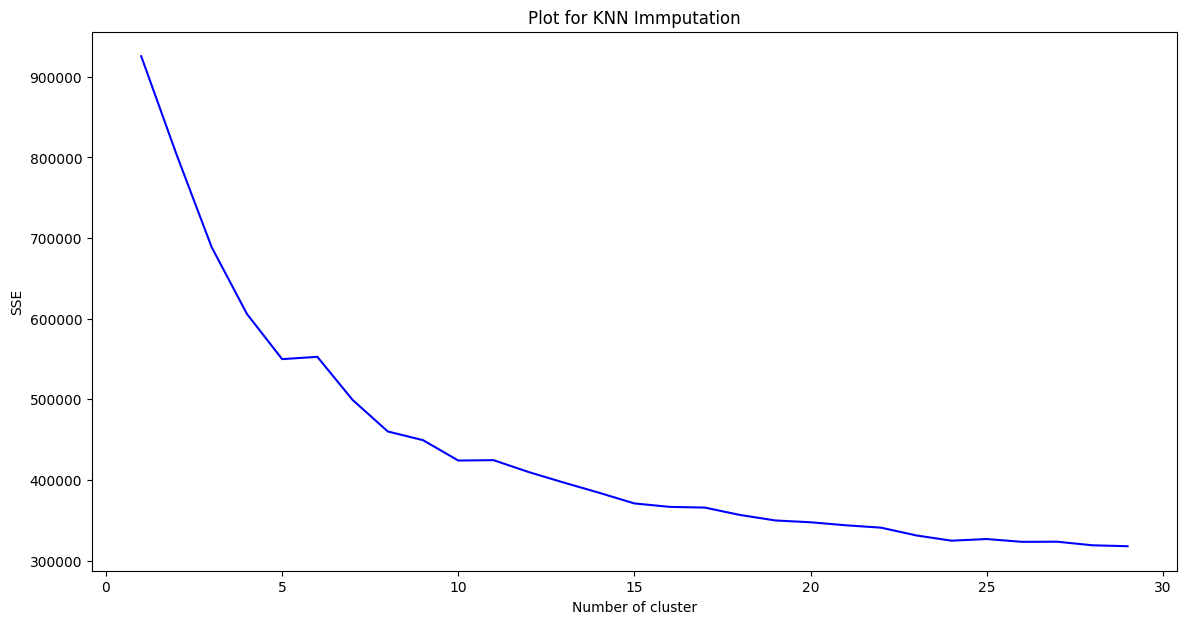

Running for  KNN Imputation with (default) 5 neighbours


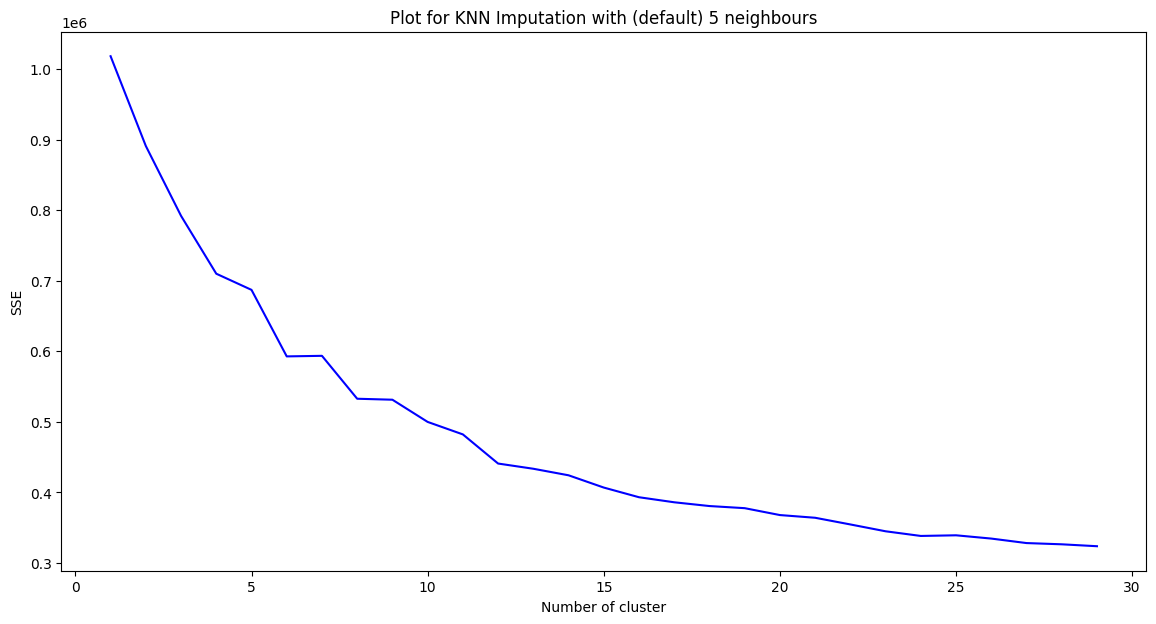

Running for  Mean Imputation 


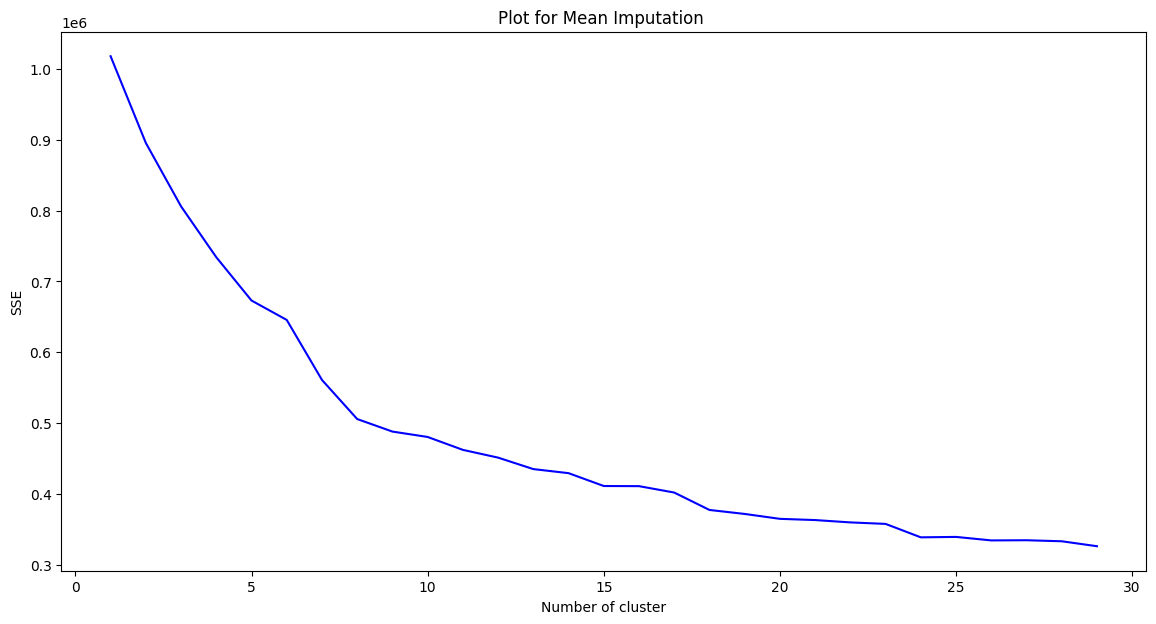

Running for  KNN Immputation + PCA


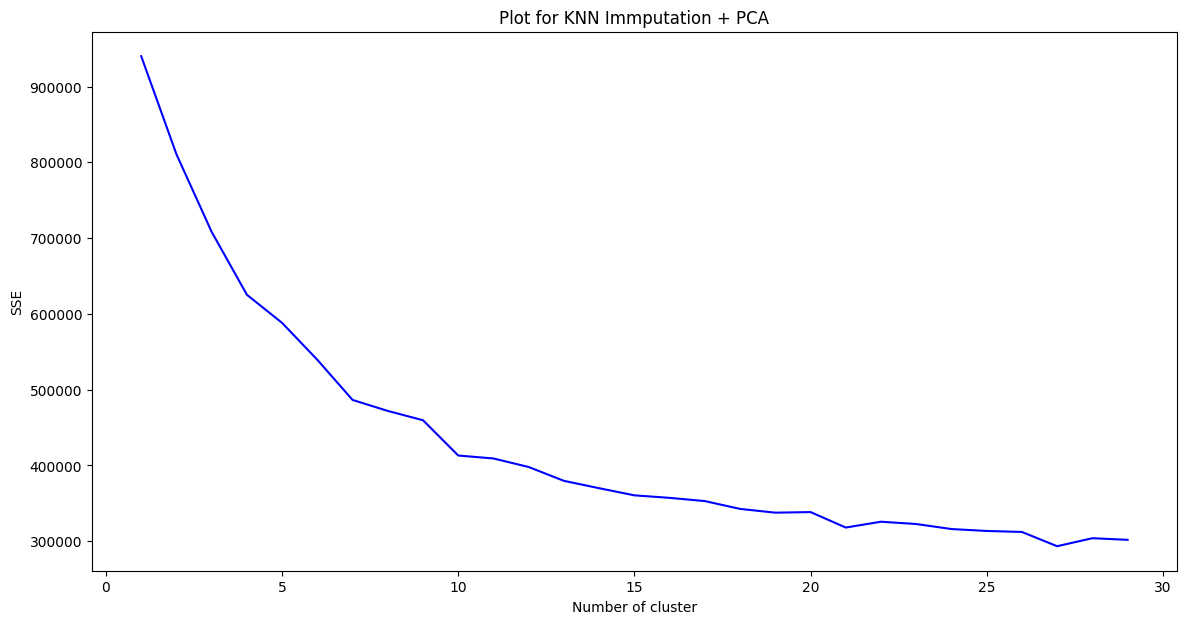

Running for  KNN Imputation Unscaled data


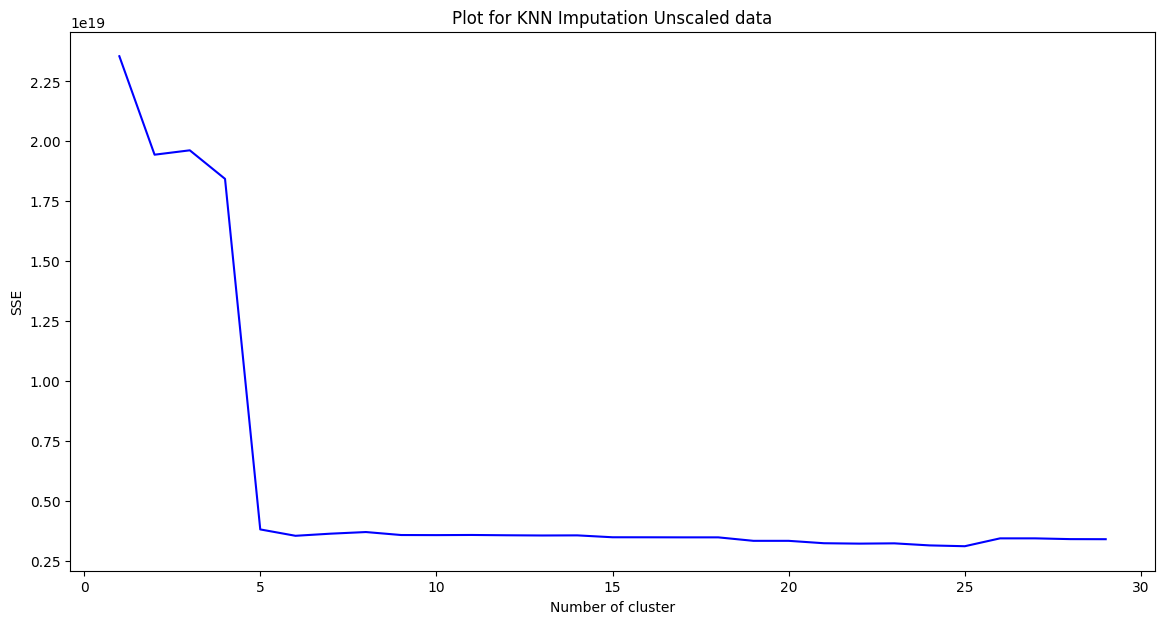

In [ ]:
for name,pipeline in [('KNN Immputation',pipe_knn),('KNN Imputation with (default) 5 neighbours',pipe_knn_5),('Mean Imputation ',pipe),
                      ('KNN Immputation + PCA', pipe_knn_pca),('KNN Imputation Unscaled data',pipe_unscaled )]:

    X = pipeline.fit_transform(data)
    X = pd.DataFrame(X)
    if "PCA" not in name :
        X.columns= data.columns

    sse = {}
    #sil_score = {}
    print("Running for ",name)
    for k in range(1, 30):
        kmeans = MiniBatchKMeans(init="k-means++",n_clusters=k,
                              random_state=0).fit(X)
        label = kmeans.labels_
        data["clusters"] = label
        #print(data["clusters"])
        sse[k] = kmeans.inertia_

    plt.figure(figsize=(14,7))
    plt.plot(list(sse.keys()), list(sse.values()),'b-',label='Sum of squared error')
    plt.xlabel("Number of cluster")
    plt.ylabel("SSE")
    plt.title("Plot for "+name)
    plt.show()

Insights



*   Top Paying job titles include 'Engineering Leadership', 'Backend Engineer', 'Product Manager', 'Program Manager', 'SDET', 'QA Engineer', 'Data Scientist', 'Android Engineer' and 'FullStack Engineer'.
*   Avg CTC seems to be decreasing with year.



Recommendations





*   Freshers who want to work on technical side should look for roles related to Backend Engineer, SDET, QA engineer, Data Scientist, Android Engineer,Full stack engineer to get good salaries as expirience increases.

